In [2]:
#required Libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import glob2
import os, fnmatch
from pathlib import Path
# import mtcnn
from mtcnn.mtcnn import MTCNN

Using TensorFlow backend.


# Processing the Videos

In [3]:
#importing file function
def find_files(directory, pattern):
    for root, dirs, files in os.walk(directory):
        for basename in files:
            if fnmatch.fnmatch(basename, pattern):
                filename = os.path.join(root, basename)
                yield filename


In [4]:
file_name = []

In [5]:
for filename in find_files('/Documents/Third_Semester/695/projects/Deepfake', '*.avi'):
    file_name.append(filename)

In [6]:
# reading video fame
# Create a VideoCapture object and read from input file

def extract_multiple_videos(intput_filenames, image_path_infile):
    """Extract video files into sequence of images.
       Intput_filenames is a list for video file names"""

    i = 1  # Counter of first video

    # Iterate file names:
#     cap = cv2.VideoCapture('/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/VidTIMIT/mstk0/sa1.avi')
    cap = cv2.VideoCapture('/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/DeepfakeTIMIT/higher_quality/mstk0/sa1-video-mrjo0.avi')

    
    if (cap.isOpened()== False):
        print("Error opening video stream or file")

        
    # Keep iterating break
    while True:
        ret, frame = cap.read()  # Read frame from first video
            
        if ret:
#           cv2.imwrite(str(i) + '.jpg', frame)  # Write frame to JPEG file (1.jpg, 2.jpg, ...)
            cv2.imwrite(os.path.join(image_path_infile , str(i) + '.jpg'), frame)  # Write frame to JPEG file (1.jpg, 2.jpg, ...)

#           cv2.imshow('frame', frame)  # Display frame for testing
            i += 1 # Advance file counter
        else:
            # Break the interal loop when res status is False.
            break

        cv2.waitKey(100) #Wait 100msec (for debugging)

    cap.release() #Release must be inside the outer loop

In [7]:
# Create a VideoCapture object and read from input file
base_path = '/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/'
real_image_path_for_frame = base_path + 'images/real'
fake_image_path_for_frame = base_path + 'images/fake'

# for real uncomment this and run
real_video_name = base_path +'VidTIMIT/mstko/sa1.avi'

#for fake uncomment this and run
fake_video_name = base_path + '/DeepfakeTIMIT/higher_quality/mstk0/sa1-video-mrjo0.avi'


# extract_multiple_videos(real_video_name, real_image_path_for_frame)
extract_multiple_videos(fake_video_name, fake_image_path_for_frame)

# Find difference between these two frames and save it as an image to visually see the difference

In [8]:
# from skimage.measure import structural_similarity as ssim
from skimage import measure
import matplotlib.pyplot as plt
import numpy as np
import cv2

# import sys
# import numpy
# numpy.set_printoptions(threshold=sys.maxsize)

In [9]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err
def compare_images(imageA, imageB, title):
    # compute the mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)
    s = measure.compare_ssim(imageA, imageB)
    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    # show the images
    plt.show()

In [10]:
# load the images -- the original, the original + contrast,
# and the original + photoshop
original = cv2.imread("/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/real/90.jpg")
shopped = cv2.imread("/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/90.jpg")
# convert the images to grayscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
shopped = cv2.cvtColor(shopped, cv2.COLOR_BGR2GRAY)

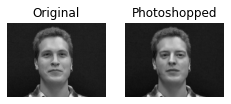

/Users/praladneupane/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:15: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  from ipykernel import kernelapp as app


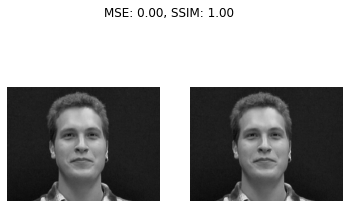

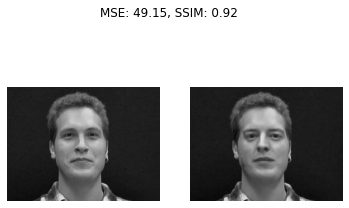

Array has non-zero items too


In [11]:
# initialize the figure
fig = plt.figure("Images")
images = ("Original", original), ("Photoshopped", shopped)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()
# compare the images
compare_images(original, original, "Original vs. Original")
compare_images(original, shopped, "Original vs. Photoshopped")
# cv2.subtract(original)
# img3 = original-shopped
image3 = cv2.absdiff(original, shopped)
image3

is_all_zero = not np.any(image3)

if is_all_zero:
    print('Array contains only 0')
else:
    print('Array has non-zero items too')

# Calculate the Structural Similarity Index (SSIM)

In [12]:
from skimage.measure import compare_ssim
import argparse
import imutils


(score, diff) = compare_ssim(original, shopped, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.9150211803207984


/Users/praladneupane/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:6: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  


# Intersting point here

The score represent the structural similarity. So our image is 91.50 % similar.

Diff variable contains the actual bit differences between two images


# Find the contours


https://www.pyimagesearch.com/2017/06/19/image-difference-with-opencv-and-python/

In [13]:
thresh = cv2.threshold(diff, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

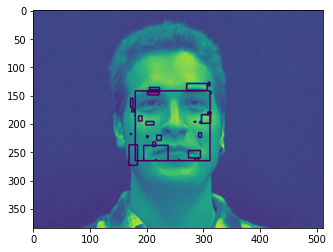

In [26]:
%matplotlib inline

# loop over the contours
for c in cnts:
    # compute the bounding box of the contour and then draw the
    # bounding box on both input images to represent where the two
    # images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(shopped, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
# show the output images

# plt.imshow("Original", original)
plt.imshow(original)


# cv2.waitKey(0)

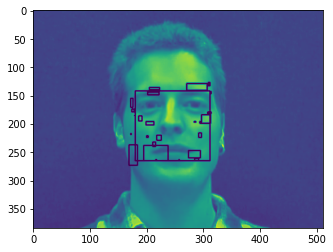

In [27]:
# plt.imshow("Modified", shopped)
plt.imshow(shopped)

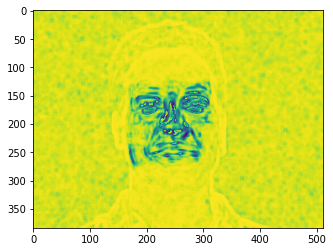

In [28]:
# plt.imshow("Diff", diff)
plt.imshow(diff)

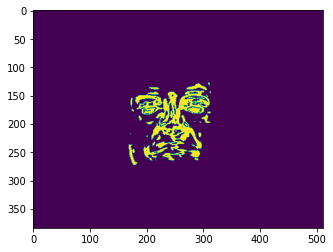

In [29]:
# plt.imshow("Thresh", thresh)
plt.imshow(thresh)

# Creating a histograme to show images differences

Create a historgam for Real Images

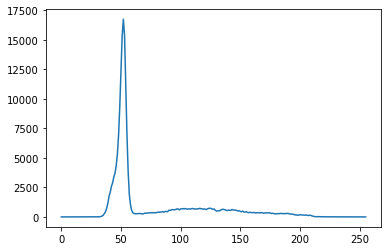

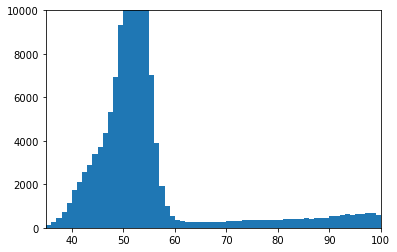

In [67]:
# for the real images
# find frequency of pixels in range 0-255 
img = '/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/real/90.jpg'
imgs = cv2.imread(img, 0)
histrReal = cv2.calcHist([imgs],[0],None,[256],[0,256]) 
  
# show the plotting graph of an image 
plt.plot(histrReal) 
plt.show() 

# alternative way to find histogram of an image 
plt.hist(imgs.ravel(),256,[0,256]) 
plt.axis([35,100,0,10000])
# plt.axis([35,100,15250,17000])
plt.savefig('real_image_histogram.png')
plt.show()


Create a historgam for fake Images

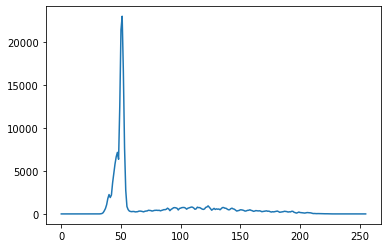

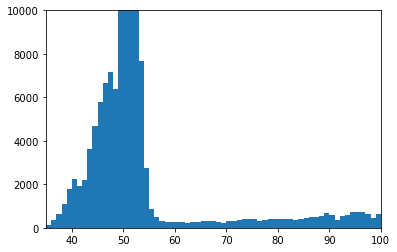

In [68]:
# for the fake images
# find frequency of pixels in range 0-255 
img = '/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/90.jpg'
imgs = cv2.imread(img, 0)
histrFake = cv2.calcHist([imgs],[0],None,[256],[0,256]) 
  
# show the plotting graph of an image 
plt.plot(histrFake) 
plt.show() 

# alternative way to find histogram of an image 
plt.hist(imgs.ravel(),256,[0,256]) 
# plt.axis([35,100,15250,17000])
plt.axis([35,100,0,10000])
plt.savefig('fake_image_histogram.png')
plt.show() 

In [69]:
cv2.compareHist(histrFake, histrReal, cv2.HISTCMP_CORREL)

0.8820412367207379

In [70]:
cv2.compareHist(histrFake, histrReal, cv2.HISTCMP_INTERSECT)

162437.0

# Perform face detection

In [11]:
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN

In [12]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list, face_filename):
    # load the image
    data = pyplot.imread(filename)
    for i in range(len(result_list)):
    # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        # define subplot
        pyplot.subplot(1, len(result_list), i+1)
        pyplot.axis('off')
        # plot face
        pyplot.imshow(data[y1:y2, x1:x2])
        pyplot.savefig('Dataset/only_face/'+ face_filename)
# show the plot
pyplot.show()

In [13]:
# this is the solution for 1.3
# reading video fame
# Create a VideoCapture object and read from input file

def extract_multiple_videos_faces(intput_video_file_names, image_path_infile):
    """Extract video files into sequence of images.
       Intput_filenames is a list for video file names"""

    i = 1  # Counter of first video

    # Iterate file names:
    cap = cv2.VideoCapture('/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/VidTIMIT/mstk0/sa1.avi')
        
    if (cap.isOpened()== False):
        print("Error opening video stream or file")

        
    # Keep iterating break
    while True:
        ret, frame = cap.read()  # Read frame from first video
            
        if ret:
            
#           cv2.imwrite(str(i) + '.jpg', frame)  # Write frame to JPEG file (1.jpg, 2.jpg, ...)
#             this code can be use to do 1.2.3 and 1.3, but i am only doing 1.3 now
#             cv2.imwrite(os.path.join(image_path_infile , str(i) + '.jpg'), frame)  # Write frame to JPEG file (1.jpg, 2.jpg, ...)
                
#           cv2.imshow('frame', frame)  # Display frame for testing
    
            filename = os.path.join(image_path_infile , str(i) + '.jpg') 
        
        # this line feels little odd. Cause it looks 
        # like i am reading it mannually but if i uncomment above line it will be dynamic everytime, cause those line 
        # creates the frame in the folder first.
        
            # load image from file
            pixels = pyplot.imread(filename)
            # create the detector, using default weights
            detector = MTCNN()
            # detect faces in the image
            faces = detector.detect_faces(pixels)
            # display faces on the original image
            face_filename_crp = str(i) + '.jpg'
            draw_image_with_boxes(filename, faces, face_filename_crp)
        
    
            i += 1 # Advance file counter
        
            face_filename = str(i) + '.jpg'
            # display faces on the original image
#             draw_image_with_boxes(filename, faces,face_filename)
        else:
            # Break the interal loop when res status is False.
            break

        cv2.waitKey(100) #Wait 100msec (for debugging)

    cap.release() #Release must be inside the outer loop



<ipython-input-12-2910a02a26d5>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot(1, len(result_list), i+1)


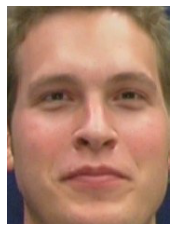

In [14]:
# calling a function

video_file_path = '/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/VidTIMIT/mstk0/sa1.avi'

base_path = '/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/'
real_image_path_for_frame = base_path + 'images/real'
fake_image_path_for_frame = base_path + 'images/fake'

extract_multiple_videos_faces(video_file_path,real_image_path_for_frame)

# if you want to detect face for fake video just change the url

# This is the end of 1.3